<a href="https://colab.research.google.com/github/samayakmalhotra/Stock-Price-Prediction/blob/main/stockLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Using Long Short Term Memory (LSTM)
#to predict the closing stock price of Delta Airlines using the past stock price available.
import math
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
#Getting the stock quote from yahoo
df = web.DataReader('DAL', data_source='yahoo', start='2012-01-01', end='2020-04-20')
#Printing the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,8.300000,8.020000,8.230000,8.040000,7093200.0,7.142008
2012-01-04,8.140000,7.830000,8.030000,8.010000,7412900.0,7.115359
2012-01-05,8.350000,7.870000,8.030000,8.330000,10509800.0,7.399619
2012-01-06,8.430000,8.240000,8.260000,8.320000,6683300.0,7.390736
2012-01-09,8.500000,8.260000,8.340000,8.280000,9015700.0,7.355205
...,...,...,...,...,...,...
2020-04-14,25.290001,23.830000,23.990000,24.540001,60843600.0,24.540001
2020-04-15,25.500000,23.309999,24.910000,24.350000,88092500.0,24.350000
2020-04-16,23.799999,22.629999,23.760000,22.780001,57610200.0,22.780001


In [ ]:
#To get the number of rows and columns in the data set
df.shape

(2087, 6)

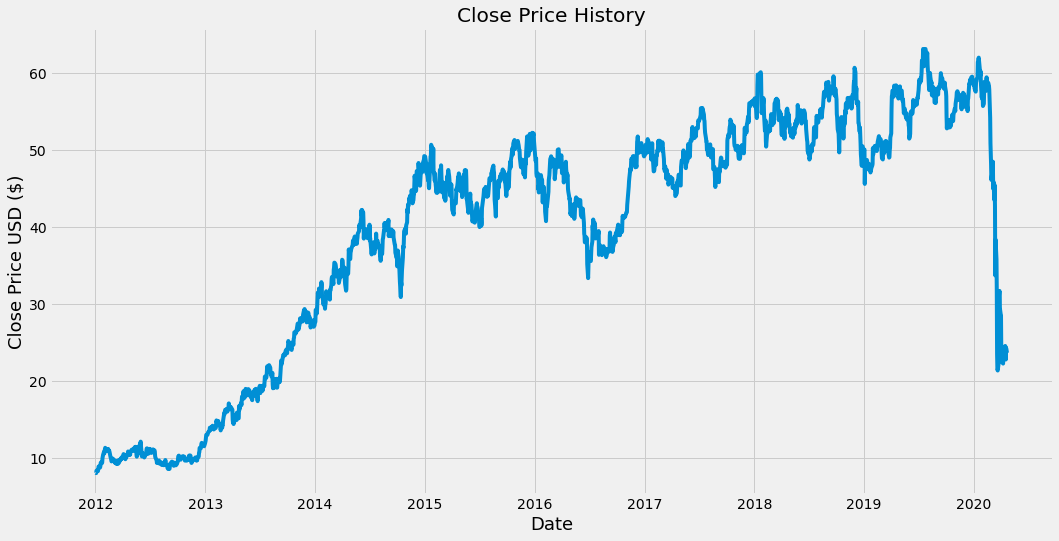

In [ ]:
#Visualizing the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:

data = df.filter(['Close'])
#Converting dataframe to a numpy array
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1670

In [ ]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00054397],
       [0.        ],
       [0.00580235],
       ...,
       [0.26781506],
       [0.29483228],
       [0.28340887]])

In [ ]:
#Creating Training data and Scaled training dataset

train_data = scaled_data[0:training_data_len , :]
#Splitting the data
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00054397, 0.        , 0.00580235, 0.00562102, 0.00489573,
       0.00471442, 0.01087941, 0.01559383, 0.01523119, 0.01305529,
       0.01650045, 0.02393472, 0.02538531, 0.02320942, 0.02484134,
       0.03535811, 0.03916591, 0.04315503, 0.05004534, 0.04605621,
       0.05240253, 0.05602901, 0.05965548, 0.05403444, 0.05367181,
       0.05403444, 0.05639165, 0.05222122, 0.05693562, 0.05312782,
       0.05113327, 0.05294651, 0.05113327, 0.03699003, 0.03481414,
       0.03046236, 0.02756119, 0.0299184 , 0.03427016, 0.03263826,
       0.02955576, 0.03191297, 0.03009973, 0.02447868, 0.02466001,
       0.02647326, 0.02466001, 0.02139618, 0.02357208, 0.02339075,
       0.02937443, 0.02175884, 0.02357208, 0.02756119, 0.03136899,
       0.02756119, 0.0291931 , 0.03390752, 0.03263826, 0.0360834 ])]
[0.03735266509866353]

[array([0.00054397, 0.        , 0.00580235, 0.00562102, 0.00489573,
       0.00471442, 0.01087941, 0.01559383, 0.01523119, 0.01305529,
       0.01650045, 0.02393472, 0.02

In [ ]:
#Converting to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1610, 60, 1)

In [ ]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compiling
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1610/1610 [==============================] - 59s 37ms/step - loss: 0.0023


In [ ]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Converting the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
#Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Finding the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

2.362643457129154

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


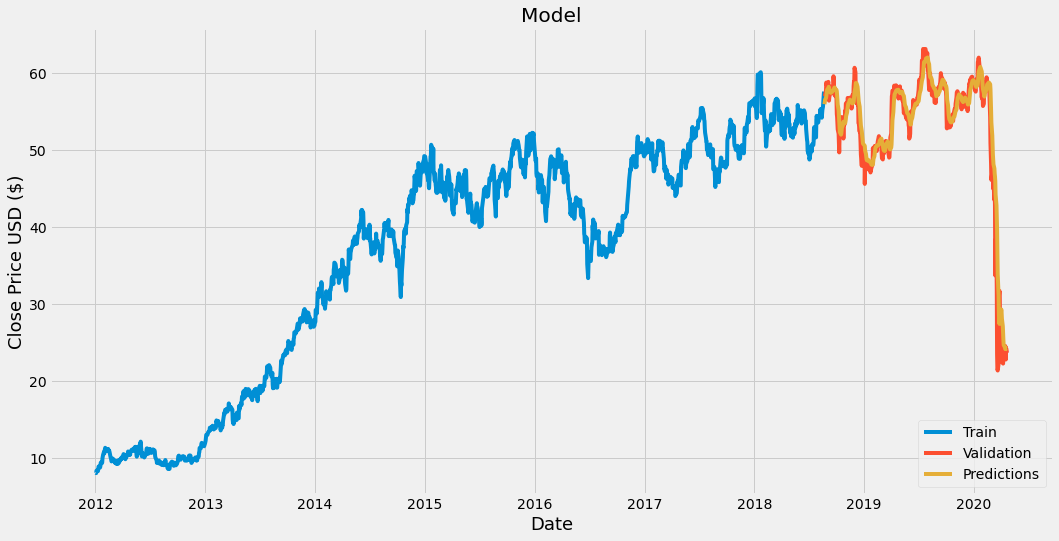

In [ ]:
#Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-22,56.910000,55.976822
2018-08-23,56.939999,56.319195
2018-08-24,57.180000,56.567398
2018-08-27,57.750000,56.766743
2018-08-28,58.790001,56.989464
...,...,...
2020-04-14,24.540001,24.156372
2020-04-15,24.350000,24.147713
2020-04-16,22.780001,24.220755


In [ ]:

delta_quote = web.DataReader('DAL', data_source='yahoo', start='2012-01-01', end='2020-04-20')
#Create a new dataframe
new_df = delta_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[24.169086]]


In [ ]:

delta_quote2 = web.DataReader('DAL', data_source='yahoo', start='2020-04-16', end='2020-04-20')
print(delta_quote2['Close'])

Date
2020-04-16    22.780001
2020-04-17    24.270000
2020-04-20    23.639999
Name: Close, dtype: float64
